In [25]:
import numpy as np
np.set_printoptions(precision=2,suppress=True)
import matplotlib.pyplot as plt
%matplotlib inline
from BLEanalysis.signals import Signals
from BLEanalysis.angleinference import AnglesUsePatternMeans as Angles, getSample

#We'll use this dataset as 'training' data (to provide the pattern):
sigs = Signals("noamploc2long.log",'d',angleOffset = 38)
#We'll use this dataset for testing
testsigs = Signals("/home/mike/Documents/Research/bluetooth_experiments/March 26 2025 Field Trial/Range Trials/2.log",'c',angleOffset=93)
angles = Angles(sigs,noisevar=10**2)
angles_testset = Angles(testsigs,noisevar=10**2)
sigs.summarise()

Standardising angles and times (shifting by 38.00 degrees)
Standardising angles and times (shifting by 93.00 degrees)
Transmitter       Number of records
        d                39557


# Using the Training Set as the Test set?

Here I just set the test set to the training data! (to see how it does)

In [26]:
#testsigs = Signals("noamploc2long.log",'d',angleOffset = 38+100)
#angles_testset = Angles(testsigs,noisevar=10**2)

([], [])

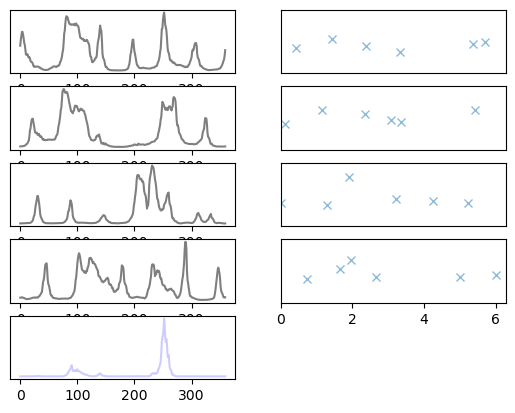

In [53]:
def normalise_logs_to_ps(logp):
    p = np.exp(logp - np.max(logp))
    p/= np.sum(p)
    return p
    
def gen_sample(burst_length, sample_interval, accept_missing = 2):
    """Generates one sample with required parameters
    burst_length = how many milliseconds the burst takes
    sample_interval = how long between samples during the burst
    accept_missing = maximum number of samples without an observation"""
    
    intervals = np.arange(-burst_length/2,burst_length,sample_interval)
    while True:
        obs, obs_angles = getSample(testsigs.data,89e4+np.random.rand()*100000,intervals,raw=True,exclude_missing=10)
        if np.sum(np.isnan(obs))>accept_missing: continue   
        break
    return obs, obs_angles

total_logp = np.zeros(360)
N = 4
for i in range(N):
    obs,obs_angles = gen_sample(1600,300)
    logp,errs,avgAtAngles,keptObs = angles.infer(obs,obs_angles)
    total_logp+=logp
    plt.subplot(N+1,2,2*i+1)
    plt.plot(normalise_logs_to_ps(logp),'-k',alpha=0.5)
    plt.yticks([],[])
    plt.xticks([]
    plt.subplot(N+1,2,2*i+2)
    
    plt.plot(obs_angles,obs,'x',alpha=0.5)
    plt.xlim([0,2*np.pi])
    plt.ylim([-100,-70])
    plt.yticks([],[])
    if i<N-1: plt.xticks([],[])
plt.subplot(N+1,2,2*N+1)
plt.plot(normalise_logs_to_ps(total_logp),'-b',alpha=0.2)
#plt.ylim([0,0.4])
plt.yticks([],[])

<function scipy.special._logsumexp.logsumexp(a, axis=None, b=None, keepdims=False, return_sign=False)>

In [18]:
####CONVERT TO PROBABILITY DISTRIBUTION (FROM LOG PROB.)


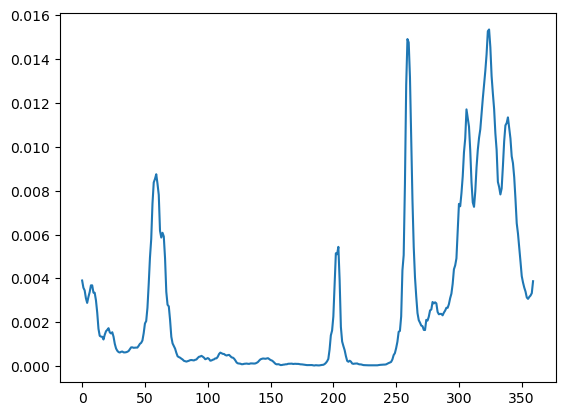

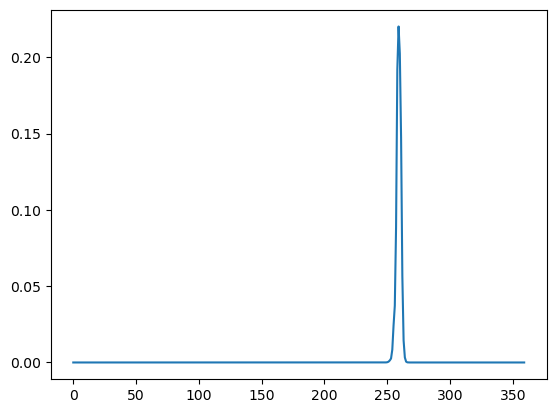

In [20]:

####CONVERT TO PROBABILITY DISTRIBUTION (FROM LOG PROB.)
p = np.exp(total_logp - np.max(total_logp))
p/= np.sum(p)
plt.plot(p)